In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import datetime

In [2]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])

E:\Anaconda Installation\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [5]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [6]:
df["Request_Closing_Time"] = df["Closed Date"] - df["Created Date"]

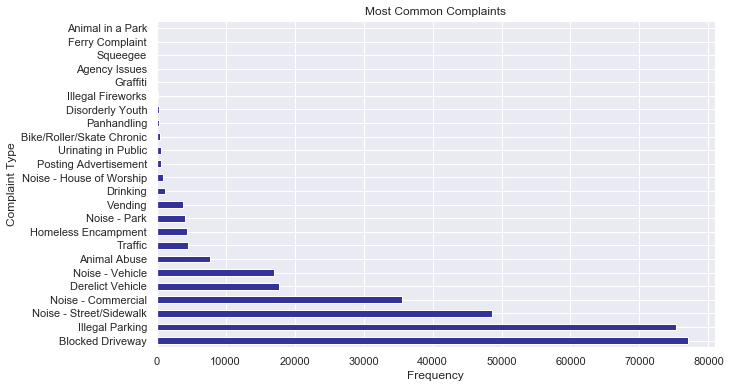

In [7]:
df['Complaint Type'].value_counts(ascending=False).head(25).plot(kind='barh', figsize=(10,6), title='Most Common Complaints', cmap = 'terrain');
plt.xlabel('Frequency')
plt.ylabel('Complaint Type')
plt.show()

#### From the above graph, we can see that Blocked Driveway and Illegal parking are the most common complaints

In [8]:
df_blocked = df[df['Complaint Type']=='Blocked Driveway']

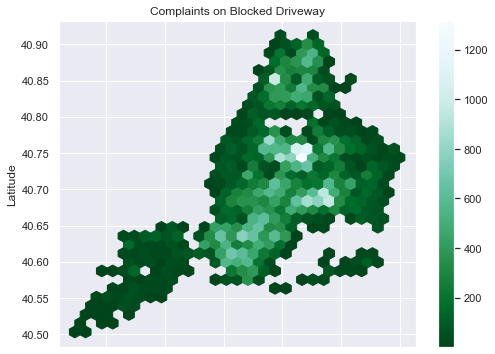

In [9]:
df_blocked.plot(kind = 'hexbin', x = 'Longitude', y = 'Latitude', gridsize=30, colormap='BuGn_r', mincnt=1, figsize=(8,6), title = 'Complaints on Blocked Driveway');

### Cities Vs Complaints

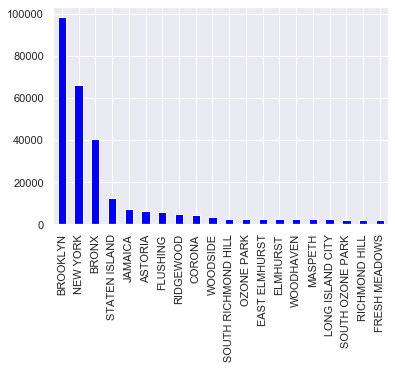

In [10]:
df['City'].value_counts().head(20).plot(kind='bar', cmap = 'winter');

#### Brooklyn city registered more complaints during the period

### Lets look at the most common complaint registered for Brooklyn

In [11]:
df_brookyn = df[df['City'] == 'BROOKLYN']

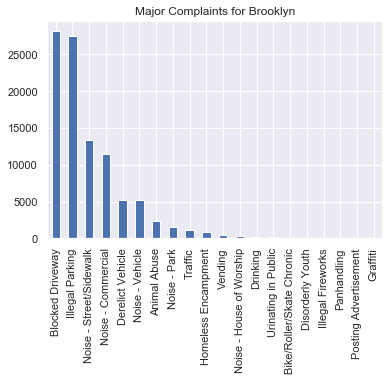

In [12]:
df_brookyn['Complaint Type'].value_counts(ascending=False).plot(kind = 'bar', title = "Major Complaints for Brooklyn");

#### More than 25000 complaints was registered for each Blocked Driveway and Illegal Parking for Brooklyn

In [13]:
df['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

In [14]:
df['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

In [15]:
df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [16]:
pd.DataFrame(df.groupby(['Complaint Type','City']).size(), columns=['No of Complaints'])

No of Complaints
Complaint Type City                           
Animal Abuse   ARVERNE                      38
               ASTORIA                     125
               BAYSIDE                      37
               BELLEROSE                     7
               BREEZY POINT                  2
...                                        ...
Vending        STATEN ISLAND                25
               SUNNYSIDE                    15
               WHITESTONE                    1
               WOODHAVEN                     6
               WOODSIDE                     15

[764 rows x 1 columns]

In [17]:
df['City'].fillna('Unknown City', inplace = True)

In [18]:
group_complaint = df.groupby('Complaint Type')

In [19]:
grp_blocked_driveway = group_complaint.get_group('Blocked Driveway')
grp_blocked_driveway.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31


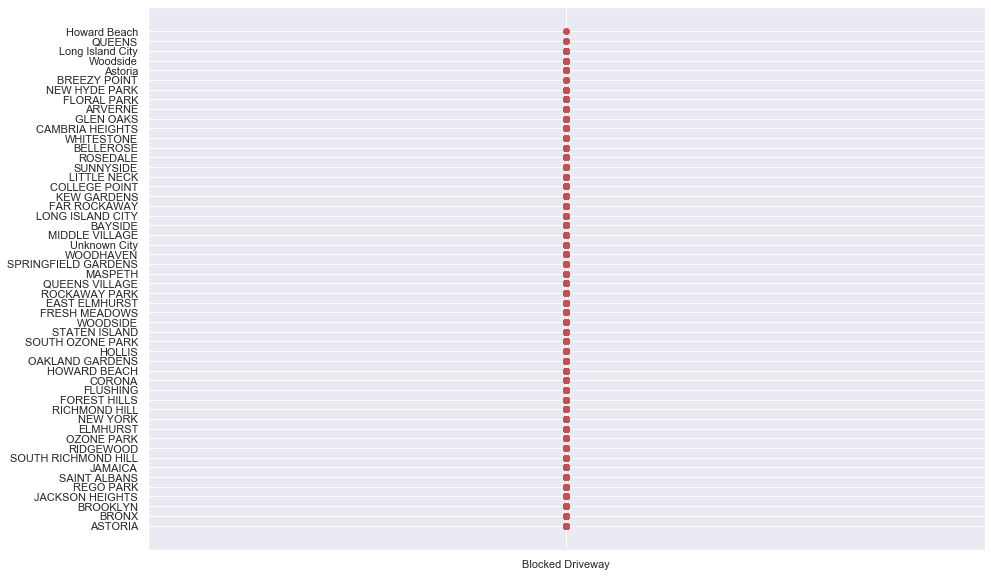

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(grp_blocked_driveway['Complaint Type'], grp_blocked_driveway['City'], c='r', );

In [21]:
df['Month'] = df['Created Date'].map(lambda x: x.month)

In [22]:
df_block = df[df['Complaint Type']=='Blocked Driveway']

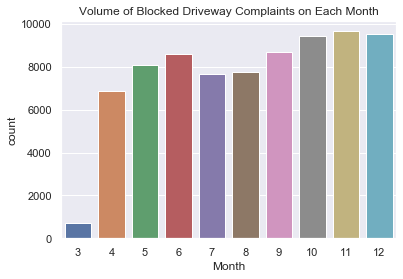

In [23]:
sns.countplot(df_block['Month'])
plt.title("Volume of Blocked Driveway Complaints on Each Month")
plt.show()

### Average Time taken to resolve for each of the Complaint Types

In [24]:
df_resolution_time = pd.DataFrame(df.groupby('Complaint Type').Request_Closing_Time.sum())
df_resolution_time

,Request_Closing_Time
Complaint Type,
Agency Issues,1 days 07:33:43
Animal Abuse,1687 days 08:28:41
Animal in a Park,14 days 00:50:05
Bike/Roller/Skate Chronic,66 days 12:58:48
Blocked Driveway,15172 days 20:55:36
Derelict Vehicle,5396 days 16:29:17
Disorderly Youth,42 days 09:45:18
Drinking,205 days 03:50:13
Ferry Complaint,0 days 00:00:00


In [25]:
no_of_complaints = df['Complaint Type'].value_counts()
no_of_complaints

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [26]:
df_resolution_time = df_resolution_time.join(pd.Series(no_of_complaints), on='Complaint Type', )

In [27]:
df_resolution_time.rename(columns={'Complaint Type': 'Total No of Complaints'}, inplace=True)

In [28]:
df_resolution_time.set_index(df_resolution_time.index, drop=True, inplace=True)

In [29]:
df_resolution_time['Avg_Resolution_Time'] = df_resolution_time['Request_Closing_Time'] / df_resolution_time['Total No of Complaints']

In [30]:
df_resolution_time

,Request_Closing_Time,Total No of Complaints,Avg_Resolution_Time
Complaint Type,,,
Agency Issues,1 days 07:33:43,6,0 days 05:15:37.166666
Animal Abuse,1687 days 08:28:41,7778,0 days 05:12:23.548598
Animal in a Park,14 days 00:50:05,1,14 days 00:50:05
Bike/Roller/Skate Chronic,66 days 12:58:48,427,0 days 03:44:24
Blocked Driveway,15172 days 20:55:36,77044,0 days 04:43:35.421525
Derelict Vehicle,5396 days 16:29:17,17718,0 days 07:18:36.387684
Disorderly Youth,42 days 09:45:18,286,0 days 03:33:30.902097
Drinking,205 days 03:50:13,1280,0 days 03:50:48.291406
Ferry Complaint,0 days 00:00:00,2,0 days 00:00:00
